In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('../input/train.csv',header = None)
train_labels = pd.read_csv('../input/trainLabels.csv',header = None)
test_data =  pd.read_csv('../input/test.csv',header = None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,-0.247797,1.527068,3.359963,1.172500,1.823865,0.032365,-0.506474,0.116775,0.302796,-0.069677,-1.067652,0.268855,-2.114816,-2.829966,-0.379520,2.498289,-0.943095,0.826023,0.738353,-1.250244,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,-0.392141,0.396406,-6.404201,0.892782,-0.277077,-2.277002,0.020142,0.244746,-3.129533,0.646215,0.596033,-0.183858,-1.724840,-4.744641,0.735539,1.987149,0.308611,0.191700,-3.309266,-1.474186,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,-1.152022,0.219019,-1.660207,1.830836,-2.055934,0.361885,0.406346,1.473729,1.697615,0.212823,-0.126665,-0.267433,-2.318000,-2.978056,0.122586,0.411849,-0.591939,-0.112360,-3.033888,-2.880890,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,1.274083,0.482342,-2.988552,-1.349692,-2.031105,0.332186,-1.521289,1.393053,-3.750689,-0.694236,0.363548,-0.585731,0.418254,-1.539170,0.566453,0.122639,1.206677,-0.832908,-0.384298,-3.082768,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,0.583663,-0.157686,-4.037594,-0.449152,1.791508,1.822303,0.287224,1.059293,-0.882400,-0.327075,-0.875657,-0.452281,-2.777583,-4.731511,0.639890,0.985756,0.577993,0.759287,-1.359054,1.191917,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [5]:
train_labels.head()

,0
0,1
1,0
2,0
3,1
4,0


In [6]:
train_data.shape,test_data.shape,train_labels.shape

((1000, 40), (9000, 40), (1000, 1))

In [7]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,-0.016250,-0.038010,-1.985616,0.012374,-0.029229,-0.039307,-0.004091,-0.032836,0.428313,0.043427,0.073461,-0.005140,0.912288,0.902301,-0.023110,0.047473,-0.041117,0.012985,-0.395782,0.123921,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,1.026325,0.985889,4.528096,0.995652,2.164547,1.002481,0.970401,1.000130,2.176020,0.987689,0.967282,0.980319,2.178778,4.241903,1.019566,0.995752,0.998182,1.030610,2.296818,2.410453,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,-3.304074,-3.157436,-14.706080,-3.002151,-6.790633,-2.914729,-3.464048,-2.944093,-8.258306,-3.423875,-4.251382,-2.822644,-6.337522,-16.156070,-3.218446,-2.820792,-3.023811,-3.054384,-8.034421,-7.105723,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,-0.713704,-0.730293,-5.094964,-0.694081,-1.441443,-0.757619,-0.668335,-0.727001,-0.983595,-0.594638,-0.588171,-0.698036,-0.542526,-1.822188,-0.720837,-0.617001,-0.668062,-0.696411,-1.936374,-1.562374,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,0.019479,-0.075950,-2.103532,-0.005946,-0.033219,-0.019046,0.008360,-0.011366,0.488217,0.082688,0.094307,-0.004404,1.050071,0.970403,-0.012183,0.014636,-0.017535,0.039219,-0.489296,-0.040604,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,0.709416,0.644553,1.186164,0.664921,1.492611,0.678748,0.674583,0.588732,1.915022,0.711525,0.727896,0.673427,2.367748,3.825862,0.671318,0.731892,0.642797,0.706336,1.044188,1.614308,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,3.409653,3.253032,12.186445,3.737423,6.959736,3.100935,2.805197,3.291544,7.074432,3.343812,2.938033,3.053262,8.096838,14.373681,2.981582,3.662800,3.293911,3.069885,7.413173,8.812739,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


## **PRE-PROCESSING**

**Train-Test Split**

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,train_labels, test_size = 0.30, random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

## **CLASSIFICATION**

In [9]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train.values.ravel()) # values.ravel() : y.train에서 목록이 아닌 값들만 1차원 배열로
predicted= model.predict(x_test)
print('Naive Bayes',accuracy_score(y_test, predicted))

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train.values.ravel())
predicted= knn_model.predict(x_test)
print('KNN',accuracy_score(y_test, predicted))

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
rfc_model.fit(x_train,y_train.values.ravel())
predicted = rfc_model.predict(x_test)
print('Random Forest',accuracy_score(y_test,predicted))

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
lr_model.fit(x_train,y_train.values.ravel())
lr_predicted = lr_model.predict(x_test)
print('Logistic Regression',accuracy_score(y_test, lr_predicted))

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
print('SVM',accuracy_score(y_test, svc_predicted))

#DECISON TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train.values.ravel())
dtree_predicted = dtree_model.predict(x_test)
print('Decision Tree',accuracy_score(y_test, dtree_predicted))

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
print('XGBoost',accuracy_score(y_test, xgb_predicted))


Naive Bayes 0.8066666666666666
KNN 0.9166666666666666
Random Forest 0.86
Logistic Regression 0.82
SVM 0.9033333333333333
Decision Tree 0.74
XGBoost 0.87


**KNN, XGBoost, SVM, Random Forest** gave good accuracy using Feature Scaling.

## **Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

X, y = train_data, np.ravel(train_labels)

std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

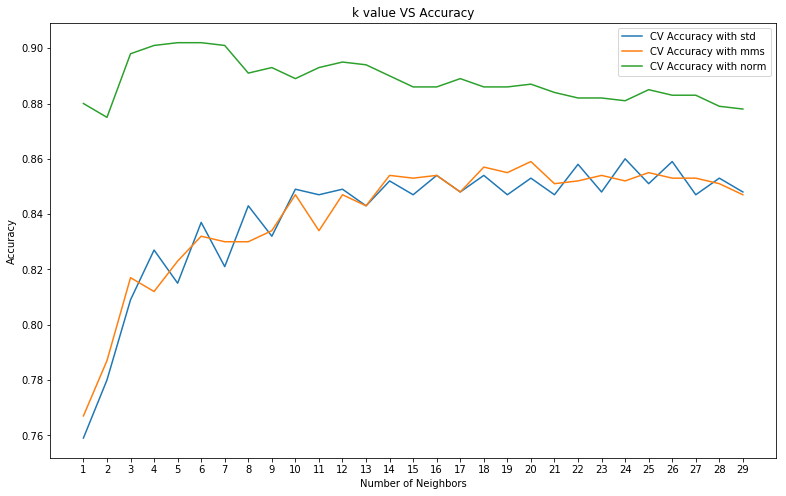

Best Accuracy with feature scaling: 0.9019999999999999
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Best scaling: norm


In [11]:
# Model complexity
neig = np.arange(1, 30)
kfold = 10
val_accuracy = {'std':[], 'mms':[], 'norm':[]}
bestKnn = None
bestAcc = 0.0
bestScaling = None
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validation accuracy
    s1 = np.mean(cross_val_score(knn, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    s2 = np.mean(cross_val_score(knn, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    s3 = np.mean(cross_val_score(knn, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling)

In [12]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
print('Naive Bayes',cross_val_score(nb_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
print('KNN',cross_val_score(knn_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
print('Random Forest',cross_val_score(rfc_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
print('Logistic Regression',cross_val_score(lr_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
print('SVM',cross_val_score(svc_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#DECISON TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
print('Decision Tree',cross_val_score(dtree_model,X_norm, train_labels.values.ravel(), cv=10).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
print('XGBoost',cross_val_score(xgb,X_norm, train_labels.values.ravel(), cv=10).mean())

Naive Bayes 0.808
KNN 0.9019999999999999
Random Forest 0.8699999999999999
Logistic Regression 0.8220000000000001
SVM 0.808
Decision Tree 0.794
XGBoost 0.8710000000000001


**KNN, XGBoost, SVM, Random Forest** gave good accuracy using Feature Scaling.

## **Principal Component Analysis**

In [13]:
from sklearn.decomposition import PCA

pca  = PCA(n_components=12)
pca_train_data = pca.fit_transform(train_data)
explained_variance = pca.explained_variance_ratio_ 

In [14]:
pca_train_data.shape

(1000, 12)

In [15]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
print('Naive Bayes',cross_val_score(nb_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
print('KNN',cross_val_score(knn_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
print('Random Forest',cross_val_score(rfc_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
print('Logistic Regression',cross_val_score(lr_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
print('SVM',cross_val_score(svc_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#DECISON TREE

from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
print('Decision Tree',cross_val_score(dtree_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
print('XGBoost',cross_val_score(xgb,pca_train_data, train_labels.values.ravel(), cv=10).mean())

Naive Bayes 0.841
KNN 0.909
Random Forest 0.9049999999999999
Logistic Regression 0.826
SVM 0.907
Decision Tree 0.7979999999999999
XGBoost 0.877


**KNN**, **Random Forest** and **SVM** gave maximum accuracy using Principal Component Analysis.


# **Feature Selection**

correlation

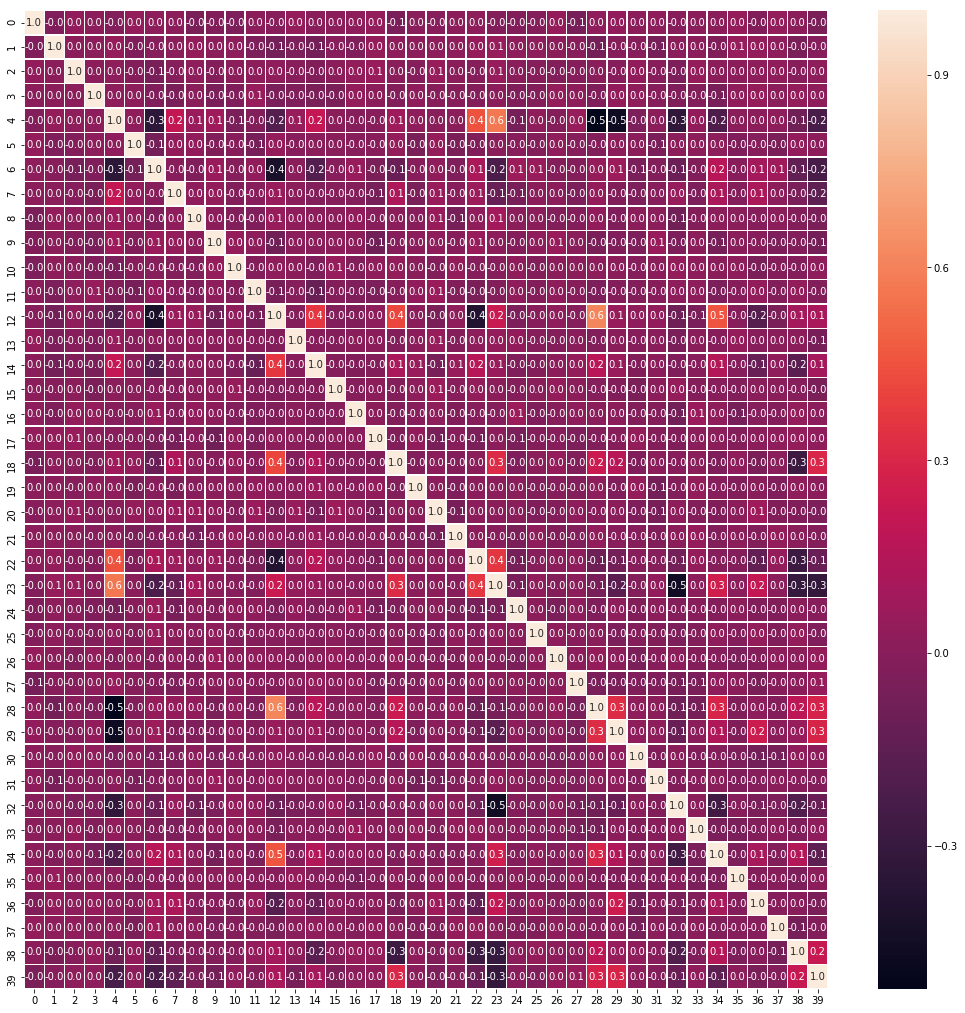

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
X_train = pd.DataFrame(X, range(700))

corr_matrix = X_train.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.7)]

to_drop

[]

## **Applying Gaussian Mixture and Grid Search to improve the accuracy**

We select the above three algorithms (KNN, Random Forest and SVM) which  gave maximum accuracy for further analysis

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

x_all = np.r_[train_data,test_data]
print('x_all shape :',x_all.shape)

# USING THE GAUSSIAN MIXTURE MODEL 
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(train_data)
gmm_test = best_gmm.predict_proba(test_data)


#Random Forest Classifier
rfc = RandomForestClassifier(random_state=99)

#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(gmm_train, train_labels.values.ravel())
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Parmas',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#KNN 
knn = KNeighborsClassifier()

#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train,train_labels.values.ravel())
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#SVM
svc = SVC()

#USING GRID SEARCH
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train, train_labels.values.ravel())
svm_best = grid_search_svm.best_estimator_
print('SVM Best Score',grid_search_svm.best_score_)
print('SVM Best Params',grid_search_svm.best_params_)
print('SVM Accuracy',cross_val_score(svm_best,gmm_train, train_labels.values.ravel(), cv=10).mean())


x_all shape : (10000, 40)
Random Forest Best Score 0.996
Random Forest Best Parmas {'max_depth': 3, 'n_estimators': 10}
Random Forest Accuracy 0.9960000000000001
KNN Best Score 0.996
KNN Best Params {'n_neighbors': 3}
KNN Accuracy 0.9960000000000001
SVM Best Score 0.996
SVM Best Params {'C': 1, 'kernel': 'linear'}
SVM Accuracy 0.9960000000000001


In [19]:
rfc_best.fit(gmm_train,train_labels.values.ravel())
pred  = rfc_best.predict(gmm_test)
rfc_best_pred = pd.DataFrame(pred)

rfc_best_pred.index += 1

rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('submission.csv',index=False)